## Install pantab package

In [1]:
!pip install pantab update

### Load a new Data Period

In [2]:
import pandas as pd
import pyarrow as pa

new_csv_file   = r'/home/csaavedra/tc24/1062/demo1/temp/Actual and Forecast Consolidated 202402.csv'
df = pd.read_csv(new_csv_file, dtype_backend="pyarrow")

In [3]:
df.head(5)

,Product,UOM,Category,Region,Id,Period,Value,Color,Comments,View,Reported_period
0,Coffee,Pound,Beverages,Africa,1,2021-01-01,1.4,0,None,Actual,2024-02
1,Coffee,Pound,Beverages,Africa,1,2021-02-01,1.45,0,None,Actual,2024-02
2,Coffee,Pound,Beverages,Africa,1,2021-03-01,1.5,0,None,Actual,2024-02
3,Coffee,Pound,Beverages,Africa,1,2021-04-01,1.55,0,None,Actual,2024-02
4,Coffee,Pound,Beverages,Africa,1,2021-05-01,1.6,0,None,Actual,2024-02


In [4]:
df['Period'] = pd.to_datetime(df["Period"]).astype(pd.ArrowDtype(pa.date32()))
df['Color'] = df['Color'].astype('string')
df['Comments'] = df['Comments'].astype('string')

print(df.dtypes)             

Product                 string[pyarrow]
UOM                     string[pyarrow]
Category                string[pyarrow]
Region                  string[pyarrow]
Id                       int64[pyarrow]
Period             date32[day][pyarrow]
Value                   double[pyarrow]
Color                    string[python]
Comments                 string[python]
View                    string[pyarrow]
Reported_period         string[pyarrow]
dtype: object


In [5]:
import pantab as pt

hyper_file     = r'/home/csaavedra/tc24/1062/demo1/temp/Consolidated.hyper'
table_name     = 'Consolidated'

print("[Inserting to existing Hyper File in Consolidated Table: {} rows]".format(len(df.index)))

pt.frame_to_hyper(df, hyper_file, table=table_name, table_mode="a")

print("[Done]")

[Inserting to existing Hyper File in Consolidated Table: 768 rows]
[Done]


# Thanks Will Ayd!
##### https://www.linkedin.com/in/will-ayd/

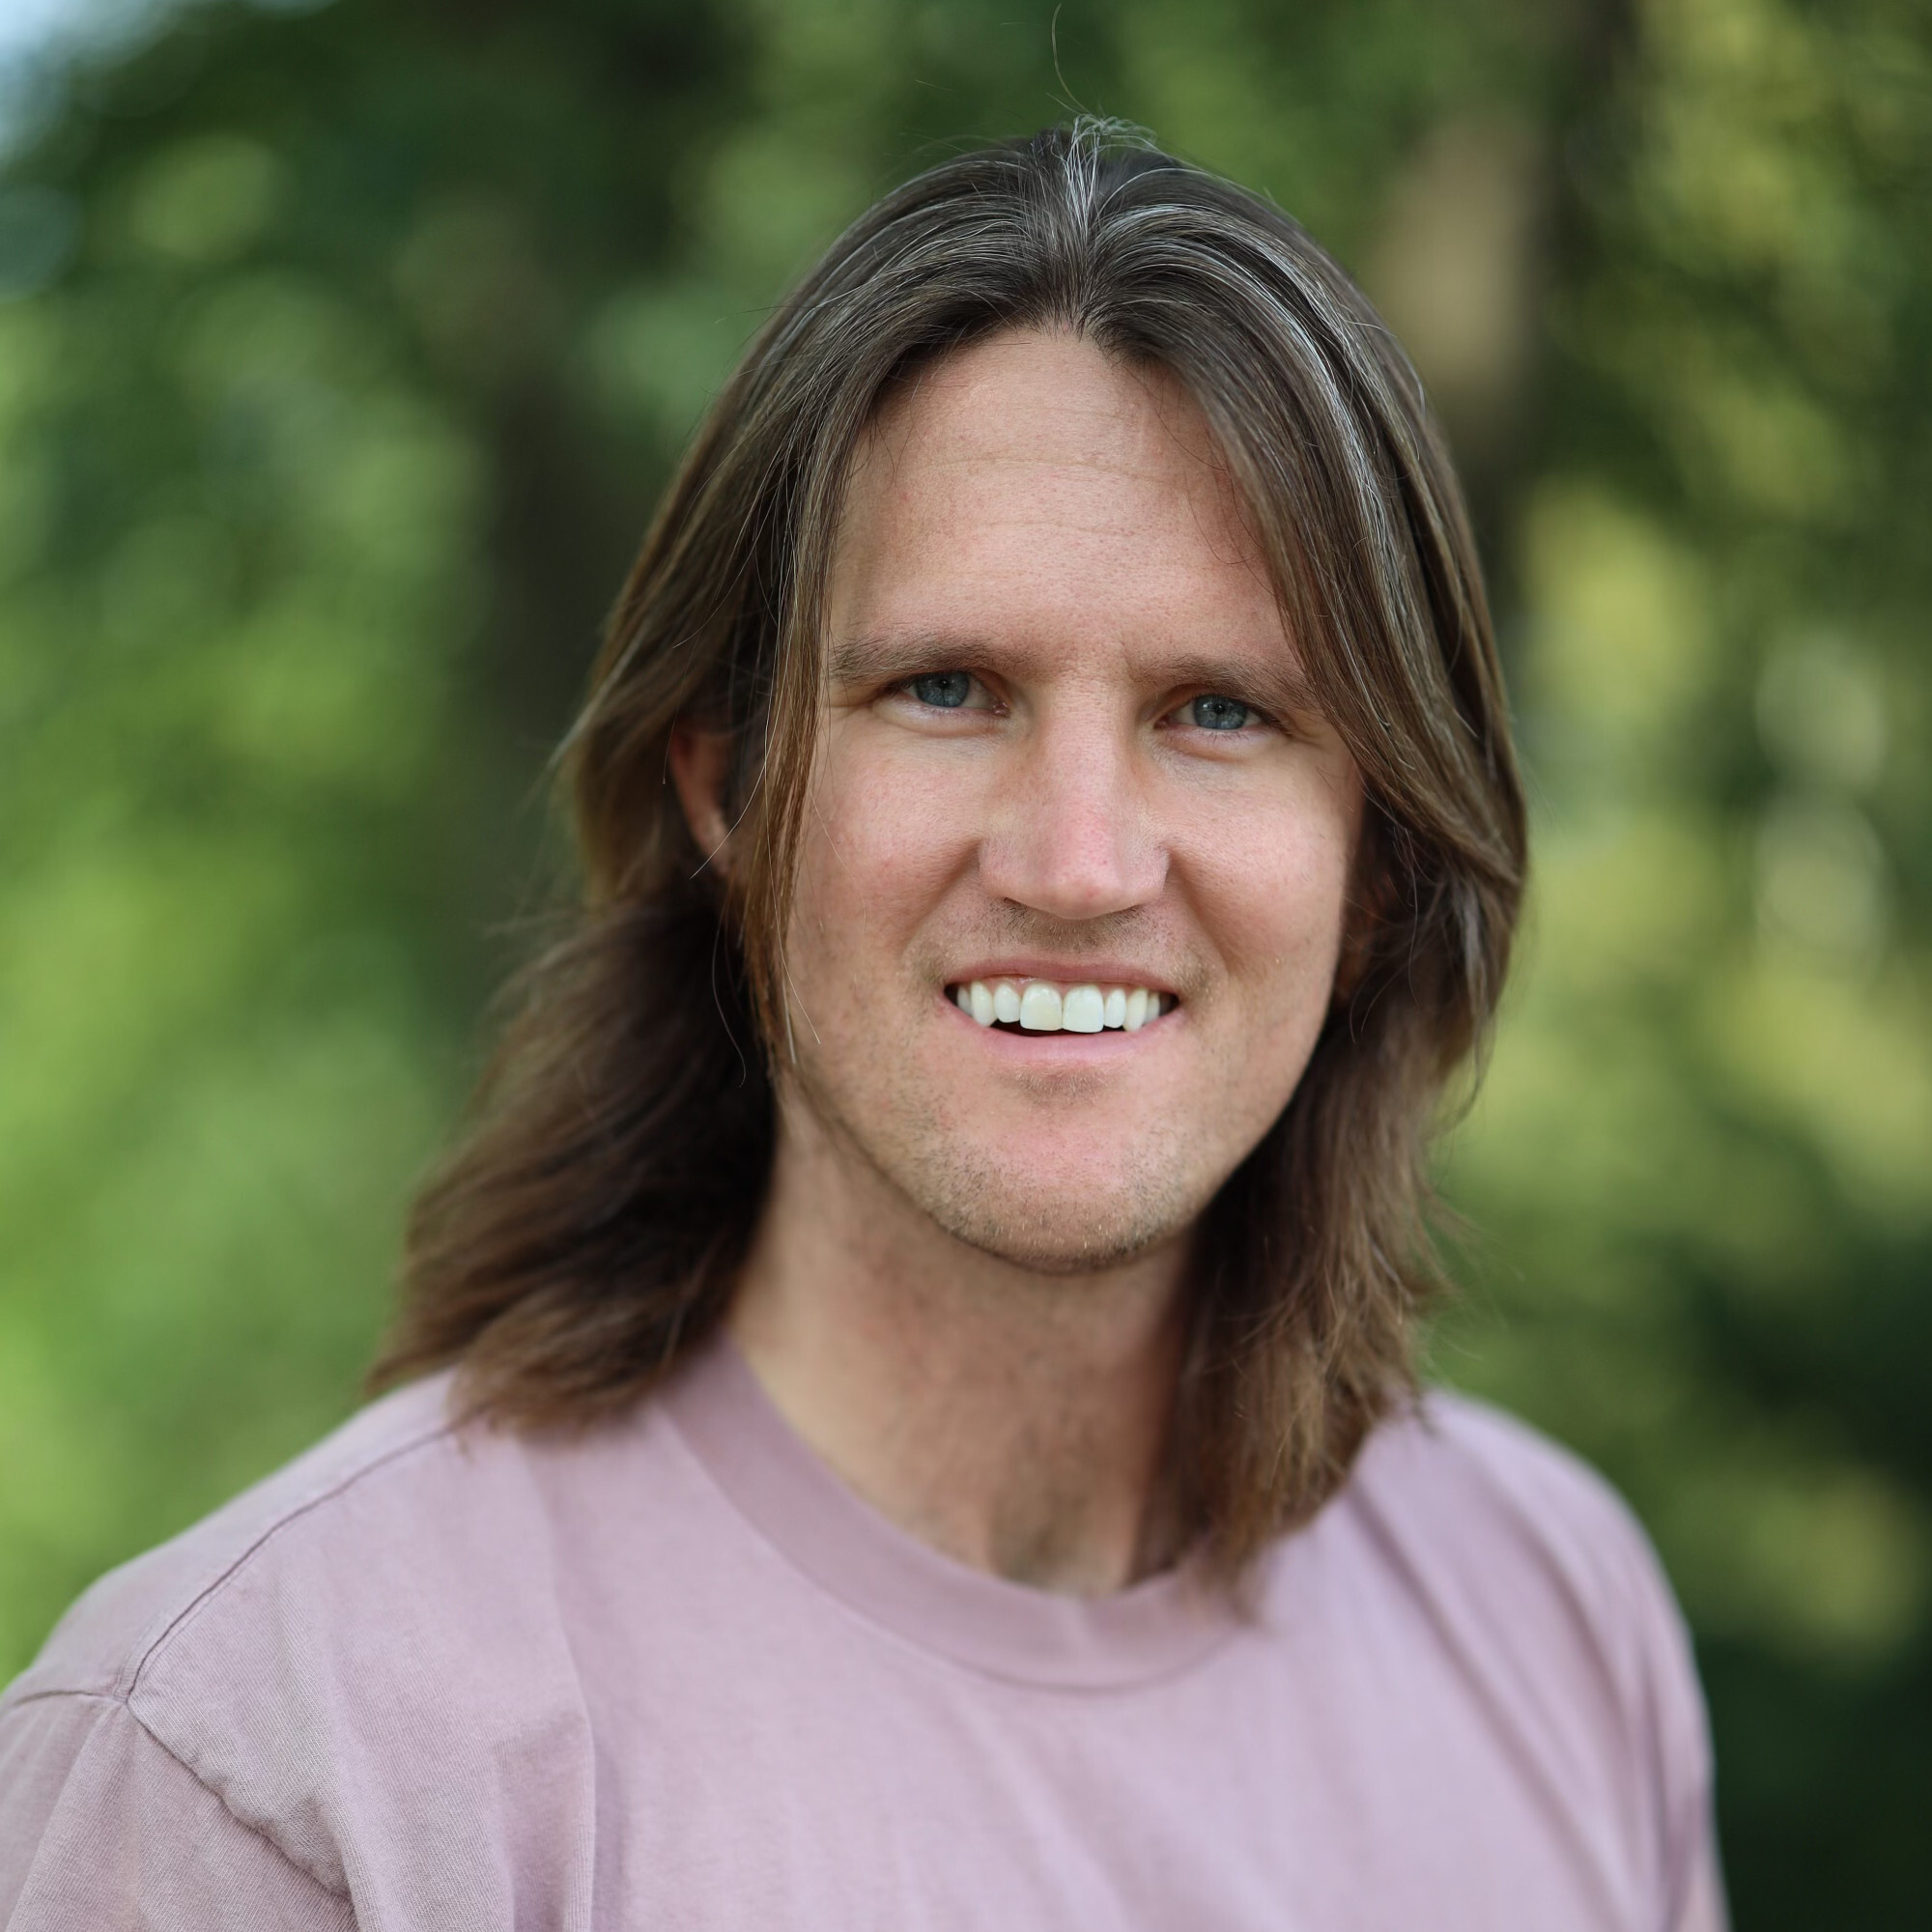

In [6]:
from IPython.display import Image
Image(filename="img/headshot.jpg", width=600)